# November 15, 2022 Data Analysis Notebook

In [27]:
# current date, for retrieving data from proper location.
year = "2022"
month = "November"
day = "15"

## Imports and initialization

In [28]:
from matplotlib import gridspec

In [29]:
import scipy.signal

In [30]:
%config Completer.use_jedi = False
import numpy as np 
from numpy import array as arr
import pandas as pd
import plotly.offline as pltly
pltly.init_notebook_mode(connected=True)
from plotly import graph_objs as go
import math
import scipy.optimize as opt
from scipy import ndimage
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import warnings 
warnings.filterwarnings('module')
from datetime import datetime
import uncertainties.unumpy
import IPython
import pandas as pd
import pickle

from matplotlib.pyplot import *
from matplotlib import rcParams
from matplotlib import style
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# ## set matplotlib plot defaults :D
# Style controls many default colors in matplotlib plots.
# Change the following if you don't like dark backgrounds. Many other options.
import matplotlib as mpl

if False:
    # My Dark Settings
    style.use(['dark_background'])
    c = '#0A0A0A'
    mpl.rcParams['axes.facecolor'] = '#000000'
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c
else:
    # My Light Settings
    style.use(['default'])
    c = '#FFFFFF'
    mpl.rcParams['axes.facecolor'] = c
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c  
# the default cycling of colors in this mode isn't very good.
#rcParams['axes.prop_cycle'] = ("cycler('color', ['r','c','g','#FFFFFF','b']) + cycler('marker', ['o','v','<','>','^'])")
### General
mpl.rcParams['figure.figsize'] = (25.0, 8.0)
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['grid.alpha'] = 0.15
mpl.rcParams['axes.formatter.limits'] = (-3,3)
mpl.rcParams['image.cmap'] = 'viridis'
#rcParams['image.cmap'] = dark_viridis_cmap
# to see all available options, decomment this line.
# print(mpl.rcParams)
mpl.rcParams['font.size'] = 14
viridis = cm.get_cmap('viridis', 256)
dark_viridis = []
bl = 0.15
for i in range(256):
    dark_viridis.append(list(viridis(i)))
    dark_viridis[-1][0] = dark_viridis[-1][0] *(bl+(1-bl)*i/255)
    dark_viridis[-1][1] = dark_viridis[-1][1] *(bl+(1-bl)*i/255)
    dark_viridis[-1][2] = dark_viridis[-1][2] *(bl+(1-bl)*i/255)
dark_viridis_cmap = ListedColormap(dark_viridis)

In [31]:
import mpl_toolkits.axes_grid1
import matplotlib.gridspec as gridspec
from skimage.transform import iradon

In [32]:
dark_viridis_cmap

In [33]:
import sys
sys.path.append("..")
from Analysis_Python_Files.fitters.Gaussian import dip, double_dip, bump, bump2, bump3, bump2r, gaussian, bump3_Sym, gaussian_2d
from Analysis_Python_Files.fitters.Sinc_Squared import sinc_sq3_Sym, sinc_sq
from Analysis_Python_Files.fitters import decaying_cos, exponential_decay_fixed_limit as decay, linear, LargeBeamMotExpansion, n1State
import Analysis_Python_Files.PictureWindow as pw
import Analysis_Python_Files.ExpFile as exp
exp.setPath(day, month, year)
import Analysis_Python_Files.PlotlyPlotters as pp
import Analysis_Python_Files.MatplotlibPlotters as mp
import Analysis_Python_Files.MainAnalysis as ma
import Analysis_Python_Files.AnalysisHelpers as ah
import Analysis_Python_Files.Miscellaneous as misc
import Analysis_Python_Files.PopulationAnalysis as pa
import Analysis_Python_Files.MarksConstants as mc
import Analysis_Python_Files.fitters as fitters
import Analysis_Python_Files.LoadingFunctions as lf
import Analysis_Python_Files.FreeSpaceImaging as fsi
import Analysis_Python_Files.TransferAnalysis as ta
import Analysis_Python_Files.LightShiftCalculations as lsc
import Analysis_Python_Files.CalibrationAnalysis as ca
# It's important to explicitly import calPoint here or else pickling doesn't work.
from Analysis_Python_Files.CalibrationAnalysis import calPoint 
from Analysis_Python_Files.TransferAnalysisOptions import TransferAnalysisOptions as ao
import Analysis_Python_Files.ThresholdOptions as to
import Analysis_Python_Files.TransferAnalysisOptions as tao

import imp
def reloadAll(day_=None, diplsayErrors=False):
    for module in sys.modules.values():
        try:
            reload(module)
        except NotImplementedError:
            if diplsayErrors:
                print(module, 'NotImplementedError')
        except AttributeError:
            if diplsayErrors:
                print(module, 'AttributeError')
        except TypeError:
            if diplsayErrors:
                print(module, 'ValueError')
        except ImportError:
            if diplsayErrors:
                print(module, 'ImportError')
    if day_ is None:
        day_ = day
    setPath(day_,month,year)

In [34]:
from importlib import reload
def reloadMyModules(day_=None, month_=None, year_=None):
    reload(exp)
    if day_ is None:
        day_ = day
    if month_ is None:
        month_ = month
    if year_ is None:
        year_ = year
    exp.setPath(day_,month_,year_)
    reload(lf)
    reload(misc)
    reload(ma)
    reload(ah)
    reload(pp)
    reload(mp)
    reload(fitters)
    reload(fsi)
    reload(ta)
    reload(pa)
    reload(tao)
    reload(to)
    reload(ca)
reloadMyModules()

## Standard Calibrations

### Temperature

#### Running Temperature

In [ ]:
reload(ca)
cTemps, cTimes = ca.loadAllTemperatureData()
legends = ['1: Master Computer', '2: B236', '3: Auxiliary Table', '4: Main Exp. (Near Ion Pump)']
fig, ax = plt.subplots(figsize=(20,10))
for temp,lab in zip(misc.transpose(cTemps), legends):
    ax.plot(cTimes,temp, label=lab, alpha=0.5, linewidth=1)
ax.legend()
ax.set_title('Lab Temperature Record');
ax.set_ylim(20,30)

In [ ]:
fig, ax = plt.subplots()
for temp,lab in zip(misc.transpose(cTemps), legends):
    ax.plot(cTimes[-50000:],temp[-50000:], label=lab, alpha=0.5, linewidth=1)


#### Today's Temperature

## individual calibrations

In [ ]:
sCalData = ca.std_analyzeAll_values()

In [ ]:
with open(exp.dataAddress + 'CalibrationData.p','wb') as calFile:
    pickle.dump(sCalData, calFile)

## Calibration Summmary

In [ ]:
# load all past calibration data into a bigger strucutre.
reloadMyModules()
calData = ca.loadAllCalData()
reloadMyModules(day_=day)

In [ ]:
reload(ca)
ca.checkData(calData)

# Today's Work

In [35]:
reloadMyModules(15)

In [36]:
atomlocs = [2, 2, 3, 7, 1]

sta: Organizing Transfer Data...
Number of Pictures: 200; Picture Dimensions: 5 x 23
Variations: 1;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 15:27:47: on (Y-M-D) 2022-11-15, And ended at 15:28:31: on 2022-11-15
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

sta: Getting Transfer Thresholds...


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning:

Covariance of the parameters could not be estimated



sta: Determining Atom Prescence...
sta: Getting Transfer Atom Images...
sta: Post-Selecting....sta: Getting Transfer Averages...
numDatasets in getTransferAvgs: 7
using default positive result condition...
using default positive result condition...
using default positive result condition...
using default positive result condition...
using default positive result condition...
using default positive result condition...
using default positive result condition...
sta: Getting Load Averages...
numDatasets in getTransferAvgs: 7
sta: Handling Fitting...
keys: No-Variation
(7, 1)
[0.85]
(7, 1)
[0.76]
(7, 1)
[0.9]
(7, 1)
[0.21]
(7, 1)
[0.29]
(7, 1)
[0.71]
(7, 1)
[0.58]
Making Avg Plots...


..\Analysis_Python_Files\MatplotlibPlotters.py:748: UserWarning:

First parameter to grid() is false, but line properties are supplied. The grid will be enabled.

..\Analysis_Python_Files\MatplotlibPlotters.py:777: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



HDF5 File number 30 Has not been annotated. Please call exp.annotate() to annotate the file.


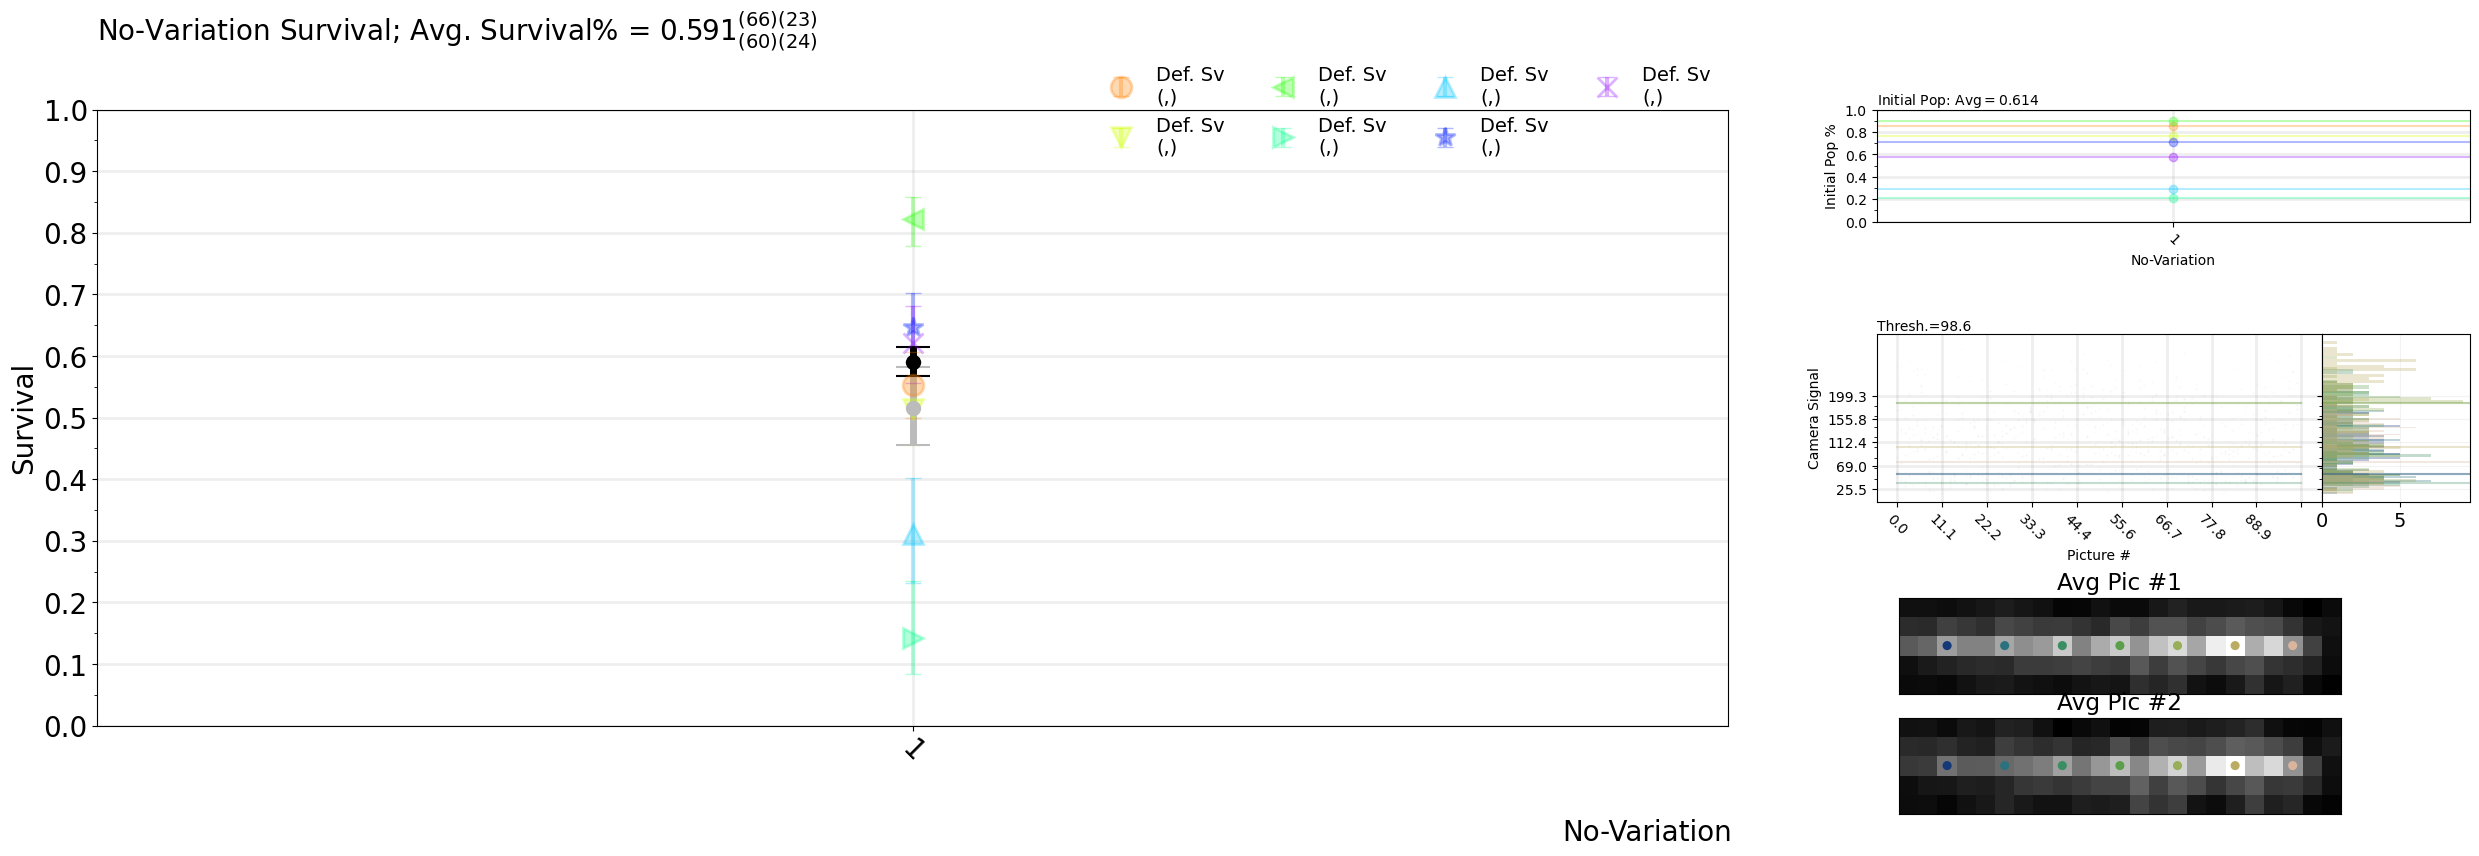

annotating file 30
HDF5 File number 30 Has not been annotated. Please call exp.annotate() to annotate the file.


Run Title ("q" to Quit): q


RuntimeError: Annotation Quit

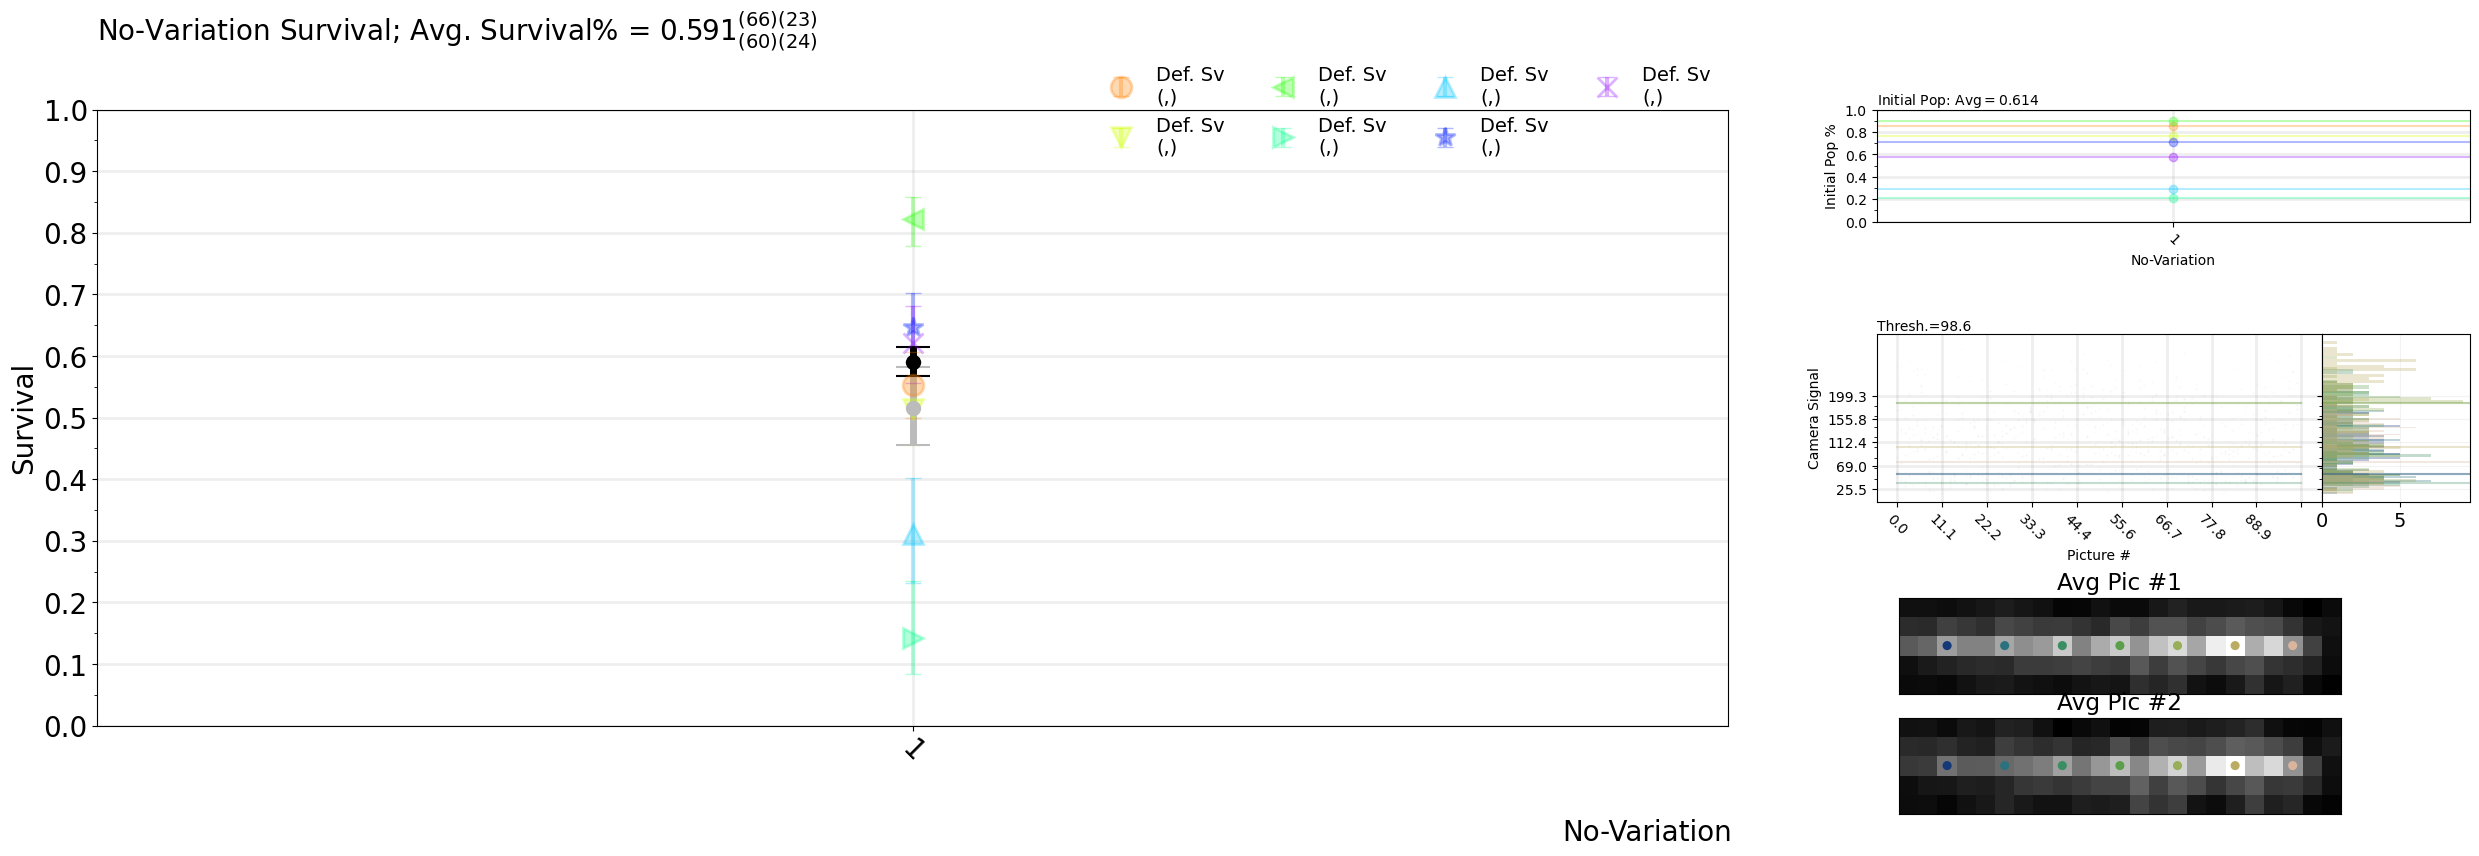

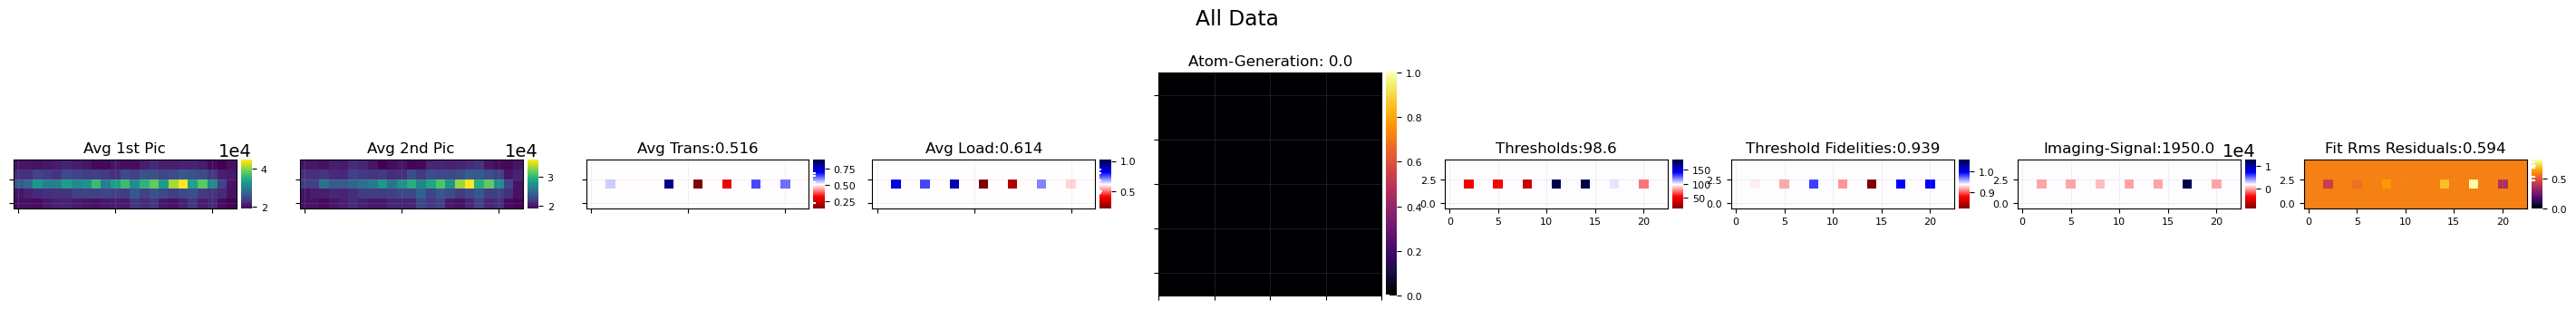

In [94]:
mp.Survival(30,atomlocs);

In [95]:
mirror_length = 50800 # um
travel_per_degree_of_turn = .71 # microns
total_degrees_turned = 144
total_travel = travel_per_degree_of_turn*total_degrees_turned
angle = np.arctan(total_travel/mirror_length)   
print(angle)

0.00201259570782498


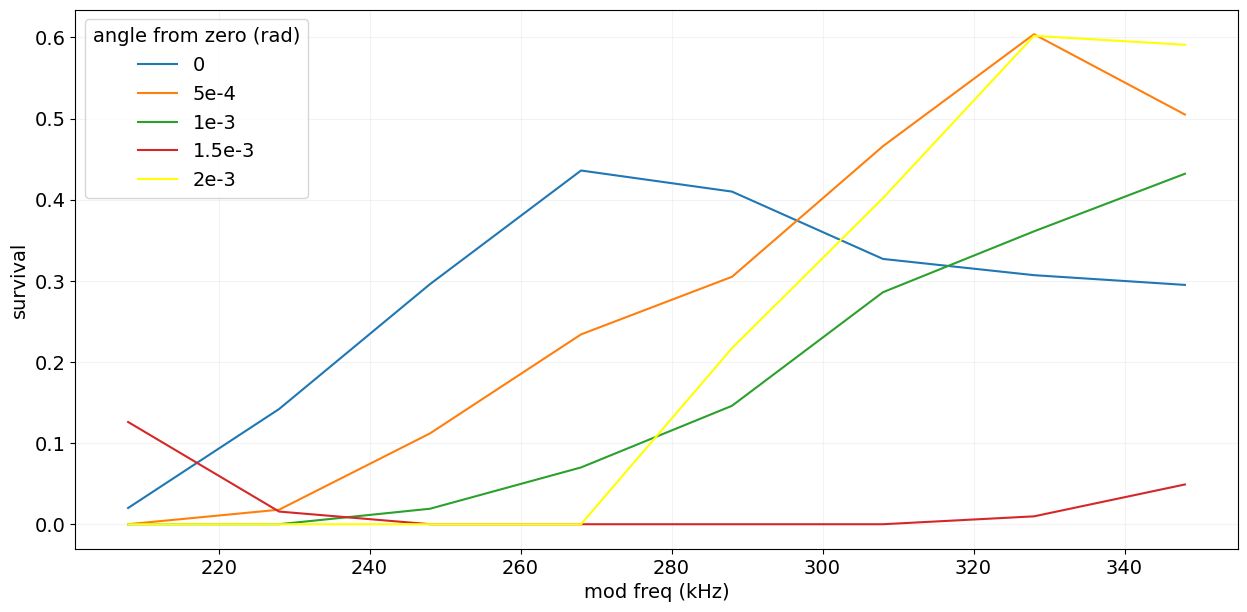

In [100]:
plt.figure(figsize=(15,7))
freq = [208,228,248,268,288,308,328,348]
surv_0 = [.02, .142, .296, .436, .41,.327, 0.307,0.295 ] # max counts = 210
surv_36 = [0,.0179,.112,.234,.305,.466,.604,.505] # max counts of 250
surv_72 = [0,0,.0191,.07,.146,.286,.361,.432 ] # max counts = 225
surv_108 = [.126,.0156,0,0,0,0,.0097,.049] # max counts = 200
surv_144 = [0,0,0,0,.217,.402,.602,.591] # max counts = 200

plt.plot(freq,surv_0, label='0')
plt.plot(freq,surv_36, label='5e-4')
plt.plot(freq,surv_72, label='1e-3')
plt.plot(freq,surv_108, label='1.5e-3')
plt.plot(freq,surv_144, label='2e-3', color = 'yellow')
plt.ylabel('survival')
plt.xlabel('mod freq (kHz)')
plt.legend(title = 'angle from zero (rad)')